![title](UCN ICI.png)

 #  <font color='#7E9BC0'> Método de Holt-Winter. </font>

<div class="alert alert-info"> </h4> **Material preparado para la carrera de Ingeniería Civil Industrial | Universidad Católica del Norte | Escuela de Ingeniería - Campus Coquimbo | Curso - Adminitración de la Producción 2.**
</h4> </div>


<div class="alert alert-block alert-warning">

<b> **Autor:**</b> 
Este material es una recopilacion de trabajos de clases y proyectos realizados por Sergio Correa Santis. Si necestita mayor información o quiere utilizar este material en forma parcial o total, solo debe utilizar la correspondiente referencia o escribir a **sergio.correa@ucn.cl**.  
</div>

Documentación:
- Método de Holt-Winter, Statsmodels: [ExponentialSmoothing](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html#statsmodels.tsa.holtwinters.ExponentialSmoothing)
- Método de Holt-Winter Fit, Statsmodels: [ExponentialSmoothing.fit](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.fit.html#statsmodels.tsa.holtwinters.ExponentialSmoothing.fit)

In [1]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
warnings.filterwarnings("ignore")

In [2]:
original = pd.read_excel('Data_2.xlsx')
df = original.copy()
df

,Periodo,Fecha,Turno nº,Cervezas
0,1,2018-06-01,1,357
1,2,2018-06-01,2,49
2,3,2018-06-01,3,242
3,4,2018-06-01,4,391
4,5,2018-06-02,1,373
...,...,...,...,...
115,116,2018-06-29,4,530
116,117,2018-06-30,1,508
117,118,2018-06-30,2,67
118,119,2018-06-30,3,328


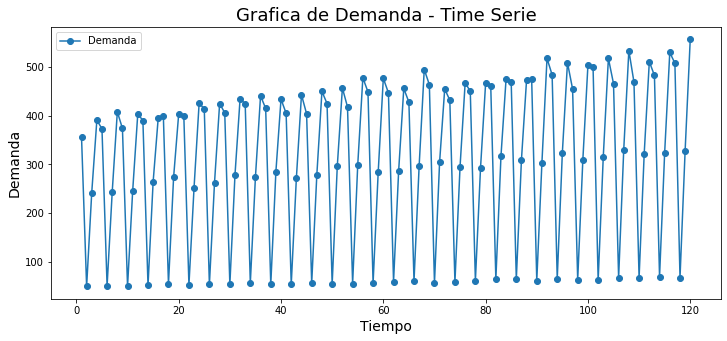

In [3]:
plt.figure(figsize=(12,5))
plt.plot(df['Periodo'],df['Cervezas'],'o-',label="Demanda")

#Nombres de gráfico y ejes.
plt.xlabel("Tiempo",fontsize=14)
plt.ylabel("Demanda",fontsize=14)
plt.title("Grafica de Demanda - Time Serie",fontsize=18)
plt.legend(loc='best')
plt.show()

#  <font color='#7E9BC0'> Método de Holt-Winter. </font>

In [4]:
y_true=df['Cervezas']
alpha =0.3
beta  =0.17
gamma =0.3

mod  = ExponentialSmoothing(y_true,seasonal_periods=4, trend='add', 
                            seasonal='add').fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma)
pred = mod.forecast(4)
pred

120    505.416826
121     86.123125
122    346.352835
123    547.652575
dtype: float64

In [5]:
df['Holt-Winter']=mod.fittedvalues.append(pred)

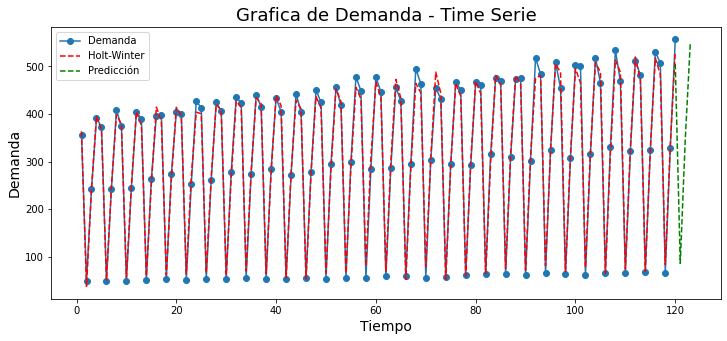

In [6]:
plt.figure(figsize=(12,5))
plt.plot(df['Periodo'],df['Cervezas'],'o-',label="Demanda")
plt.plot(df['Periodo'],df['Holt-Winter'],'--',color="red",label="Holt-Winter")
plt.plot(pred,'--',color="green",label="Predicción")

#Nombres de gráfico y ejes.
plt.xlabel("Tiempo",fontsize=14)
plt.ylabel("Demanda",fontsize=14)
plt.title("Grafica de Demanda - Time Serie",fontsize=18)
plt.legend(loc='best')
plt.show()

#  <font color='#7E9BC0'> Método de Holt-Winter. </font>

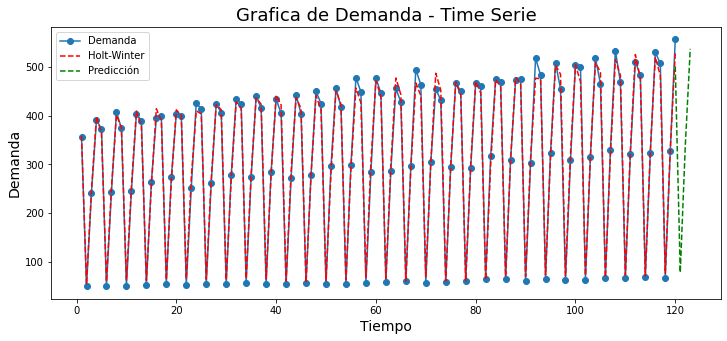

In [7]:
df = original.copy()
y_true=df['Cervezas']

mod  = ExponentialSmoothing(y_true,seasonal_periods=4, trend='add',seasonal='add').fit(optimized=True, use_brute=True)
pred = mod.forecast(4)
df['Holt-Winter']=mod.fittedvalues.append(pred)

plt.figure(figsize=(12,5))
plt.plot(df['Periodo'],df['Cervezas'],'o-',label="Demanda")
plt.plot(df['Periodo'],df['Holt-Winter'],'--',color="red",label="Holt-Winter")
plt.plot(pred,'--',color="green",label="Predicción")

#Nombres de gráfico y ejes.
plt.xlabel("Tiempo",fontsize=14)
plt.ylabel("Demanda",fontsize=14)
plt.title("Grafica de Demanda - Time Serie",fontsize=18)
plt.legend(loc='best')
plt.show()

In [8]:
mod.params_formatted

,name,param,optimized
smoothing_level,alpha,0.105263,True
smoothing_slope,beta,0.105263,True
smoothing_seasonal,gamma,0.421053,True
initial_level,l.0,434.833333,True
initial_slope,b.0,2.187500,True
initial_seasons.0,s.0,-77.833333,True
initial_seasons.1,s.1,-385.833333,True
initial_seasons.2,s.2,-192.833333,True
initial_seasons.3,s.3,-43.833333,True


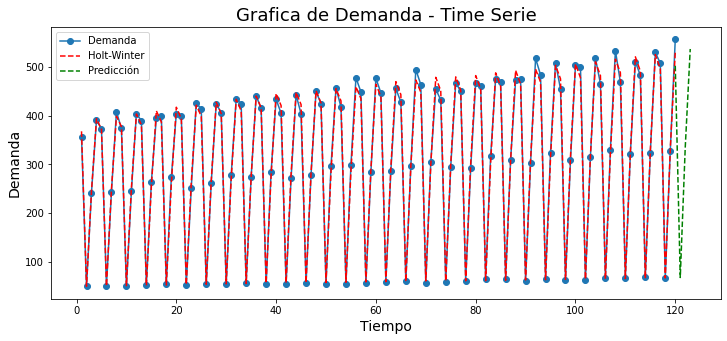

In [9]:
df = original.copy()
y_true=df['Cervezas']

mod  = ExponentialSmoothing(y_true,seasonal_periods=4, trend='add',seasonal='mul').fit(optimized=True, use_basinhopping=True)
pred = mod.forecast(4)
df['Holt-Winter']=mod.fittedvalues.append(pred)

plt.figure(figsize=(12,5))
plt.plot(df['Periodo'],df['Cervezas'],'o-',label="Demanda")
plt.plot(df['Periodo'],df['Holt-Winter'],'--',color="red",label="Holt-Winter")
plt.plot(pred,'--',color="green",label="Predicción")

#Nombres de gráfico y ejes.
plt.xlabel("Tiempo",fontsize=14)
plt.ylabel("Demanda",fontsize=14)
plt.title("Grafica de Demanda - Time Serie",fontsize=18)
plt.legend(loc='best')
plt.show()

In [10]:
mod.params_formatted

,name,param,optimized
smoothing_level,alpha,0.047602,True
smoothing_slope,beta,0.047597,True
smoothing_seasonal,gamma,0.000000,True
initial_level,l.0,434.851920,True
initial_slope,b.0,1.631244,True
initial_seasons.0,s.0,0.842925,True
initial_seasons.1,s.1,0.112652,True
initial_seasons.2,s.2,0.559537,True
initial_seasons.3,s.3,0.894527,True


In [11]:
#Obtener factores de Estacionalidad:

estacionalidad_factor=mod.params['initial_seasons']
estacionalidad_factor

array([0.84292451, 0.11265158, 0.55953681, 0.89452695])